In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import scipy.integrate as integrate
from scipy.linalg import ishermitian

<h3>Average joe, Half BHZ model</h3>

In [ ]:
sigmax = np.matrix(np.array([[0,1],[1,0]]))
sigmay = np.matrix(np.array([[0,-1j],[1j,0]]))
sigmaz = np.matrix(np.array([[1,0],[0,-1]]))

def hamBHZ(kx, ky, m):
    return np.sin(kx)*sigmax + np.sin(ky)*sigmay + (m - np.cos(kx) - np.cos(ky))*sigmaz

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

kx = np.arange(-np.pi, np.pi+0.1, 0.1)
ky = np.arange(-np.pi, np.pi+0.1, 0.1)
X, Y = np.meshgrid(kx, ky)
m = 0
z1 = np.zeros((len(kx),len(ky)))
z2 = np.zeros((len(kx),len(ky)))
for i in range(len(kx)):
    for j in range(len(ky)):
        z1[i,j] = np.real(np.sort(la.eigvals(hamBHZ(kx[i],ky[j],m)))[0])
        z2[i,j] = np.real(np.sort(la.eigvals(hamBHZ(kx[i],ky[j],m)))[1])
ax.plot_surface(X, Y, z1)
ax.plot_surface(X, Y, z2)
plt.show()



<h3>Temporal Half BHZ model, rational limit (single common frequency)</h3>
We let $\omega_1 / \omega_2 = p/q$, with $\omega_2 = 0.1$. The common frequency is $\omega = \omega_2/q$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import scipy.integrate as integrate
from scipy.linalg import ishermitian

In [ ]:
m1 = Hf1(3, w1, 0, w2, 0 , mass, w)

In [ ]:
ishermitian(m1)

In [ ]:
w2 = 0.1
p = 8
q = 5
w1 = (p/q)*w2
w = w2/q
latsize = 3
# t2 = 2*np.pi/w2
# t1 = 2*np.pi/w1
# t = 2*np.pi/w

def hamBHZpqnm(n, m, w1, phi1, w2, phi2, mass, w):
    hnm = np.zeros((2,2), dtype=complex)
    t = 2*np.pi/w
    hnm[0,0] = (1/t)*(integrate.quad(lambda t: np.real(( (mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2)) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0] + 1j*integrate.quad(lambda t: np.imag(( (mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2)) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0])
    hnm[1,1] = -hnm[0,0]#(1/t)*(integrate.quad(lambda t: np.real(( -(mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2)) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0] + 1j*integrate.quad(lambda t: np.imag(( -(mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2)) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0])
    
    hnm[0,1] = (1/t)*(integrate.quad(lambda t: np.real(( np.sin(w1*t + phi1) - 1j*np.sin(w2*t + phi2) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0] + 1j*integrate.quad(lambda t: np.imag(( np.sin(w1*t + phi1) - 1j*np.sin(w2*t + phi2) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0])
    hnm[1,0] = (1/t)*(integrate.quad(lambda t: np.real(( np.sin(w1*t + phi1) + 1j*np.sin(w2*t + phi2) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0] + 1j*integrate.quad(lambda t: np.imag(( np.sin(w1*t + phi1) + 1j*np.sin(w2*t + phi2) )*np.exp(1j*(m-n)*w*t)), 0, 2*np.pi/w)[0])
    
    return hnm

def Hf1(lat, w1, phi1, w2, phi2, mass, w):
    blocks = []
    for i in range(1, lat+1):
        row = []
        for j in range(1, lat+1):
            matij = hamBHZpqnm(i, j, w1, phi1, w2, phi2, mass, w)
            if (i==j):
                matij = matij - i*w*np.eye(2,dtype=complex)
            row.append(matij)
        blocks.append(row)
    m = np.block(blocks)
    # for i in range(m.shape[0]):
    #     m[i,i] = m[i,i] - i*W
    return m

<h3>Temporal Half BHZ model (2 frequencies)</h3>
Although it is still unclear how to handle integrations with infinite limits. 

In [2]:
def nfib(n):
    def fib(k):
        if k == 0:
            return (0, 1)
        else:
            a, b = fib(k >> 1)
            c = a * ((b << 1) - a)
            d = a * a + b * b
            if k & 1:
                return (d, c + d)
            else:
                return (c, d)
    return fib(n)[0]

In [3]:
# w2 = 0.1
# w1 = np.sqrt(2)*w2

def hamBHZ2nm(n, m, w1, phi1, w2, phi2, mass, w):
    hnm = np.zeros((2,2), dtype=complex)
    # t = 2*np.pi/w
    l = 2*np.pi/w
    wvec = np.array([w1, w2])
    aa = lambda t: (mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*np.exp(1j*t*np.dot(m-n, wvec))
    ab = lambda t: (np.sin(w1*t + phi1) - 1j*np.sin(w2*t + phi2) )*np.exp(1j*t*np.dot(m-n, wvec))
    ba = lambda t: (np.sin(w1*t + phi1) + 1j*np.sin(w2*t + phi2) )*np.exp(1j*t*np.dot(m-n, wvec))
    dt = 0.1
    tvals = np.arange(0, l+0.1, 0.1)
    aa_list = np.array([aa(i) for i in tvals])
    # bb_list = -1*aa_liste
    ab_list = np.array([ab(i) for i in tvals])
    ba_list = np.array([ba(i) for i in tvals])
    
    hnm[0,0] =  integrate.simpson(aa_list, tvals)  #(0.5/l)*(integrate.quad(lambda t: np.real( (mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0] + 1j*integrate.quad(lambda t: np.imag((mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0])
    hnm[1,1] = -hnm[0,0]  #-hnm[0,0]#(1/t)*(integrate.quad(lambda t: np.real( -(mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*np.exp(1j*t*np.dot(m-n, wvec))), 0, 2*np.pi/w)[0] + 1j*integrate.quad(lambda t: np.imag(-(mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*np.exp(1j*t*np.dot(m-n, wvec))), 0, 2*np.pi/w)[0])
    hnm[0,1] = integrate.simpson(ab_list, tvals)   #(0.5/l)*(integrate.quad(lambda t: np.real(( np.sin(w1*t + phi1) - 1j*np.sin(w2*t + phi2) )*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0] + 1j*integrate.quad(lambda t: np.imag(( np.sin(w1*t + phi1) - 1j*np.sin(w2*t + phi2) )*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0])
    hnm[1,0] = integrate.simpson(ba_list, tvals)   #(0.5/l)*(integrate.quad(lambda t: np.real(( np.sin(w1*t + phi1) + 1j*np.sin(w2*t + phi2) )*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0] + 1j*integrate.quad(lambda t: np.imag(( np.sin(w1*t + phi1) + 1j*np.sin(w2*t + phi2) )*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0])
    
    return hnm

def Hf2(lat, w1, phi1, w2, phi2, mass, w):
    latpose = [np.array([i,j]) for i in range(lat) for j in range(lat)]
    wvec = np.matrix(np.array([w1, w2]))
    blocks = []
    for i in latpose:
        row = []
        for j in latpose:
            if(i[0] == j[0] & i[1] == j[1]):
                row.append( hamBHZ2nm(i, j, w1, phi1, w2, phi2, mass, w) )# - np.dot(i, np.array([w1, w2]))*np.identity(2, dtype=complex) )
            else:
                row.append( hamBHZ2nm(i, j, w1, phi1, w2, phi2, mass, w) )
        blocks.append(row)
    nw = [np.dot(wvec, i) for i in latpose]
    ef = np.diagonal(nw)#, dtype=complex)
    hf = np.block(blocks) - ef
    return hf

In [10]:
w2 = 0.1
fib = 5
p = nfib(fib)
q = nfib(fib-1)
w1 = (p/q)*w2
w = w2/q
latsize = 7
phi1 = 0
phi2 = 0
mass = 1

# w2 = 0.1
# p = 8
# q = 5
# w1 = (p/q)*w2
# w = w2/q
# latsize = 3

# ham = Hf2(latsize, w1, phi1, w2, phi2, mass, w)

In [ ]:
ishermitian(ham)

In [5]:
def calculate_bott(H, Lx, Ly, ndof=2):
    L = Lx * Ly
    dim = ndof * L

    # --- Site coordinates (1D arrays) ---
    cell_x = np.zeros(dim, dtype=int)
    cell_y = np.zeros(dim, dtype=int)

    for x in range(Lx):
        for y in range(Ly):
            i = x * Ly + y
            for sub in range(ndof):
                idx = ndof * i + sub
                cell_x[idx] = x
                cell_y[idx] = y

    # --- Diagonalize Hamiltonian ---
    evals, evecs = la.eigh(H)

    # --- Projector onto occupied states ---
    occupied = evals < 0
    P = evecs[:, occupied] @ evecs[:, occupied].conj().T

    # --- Unitary position operators ---
    theta = (2.0 * np.pi / Lx) * cell_x
    phi_b = (2.0 * np.pi / Ly) * cell_y
    Ux = np.diag(np.exp(1j * theta))
    Uy = np.diag(np.exp(1j * phi_b))

    # --- Projected unitaries ---
    U = P @ Ux @ P
    V = P @ Uy @ P

    # --- Bott Operator ---
    W = V @ U @ V.conj().T @ U.conj().T

    # --- Bott index ---
    eigvals_W = la.eigvals(W)
    trace_log = np.sum(np.log(eigvals_W[np.abs(eigvals_W) > 1e-12]))
    bott_index = np.imag(trace_log) / (2 * np.pi)

    return bott_index

In [14]:
mass_vals = np.arange(0.1, 4, 0.5)
mass_vals


array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6])

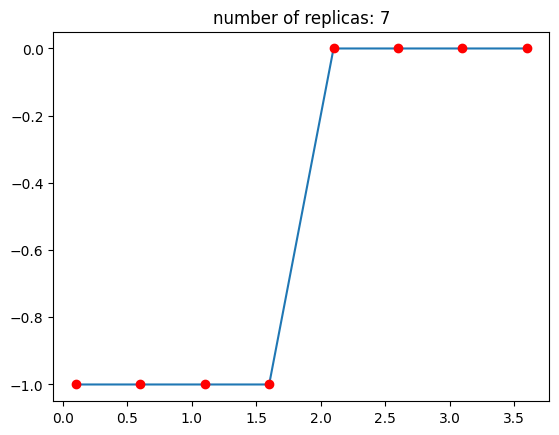

In [11]:
bott_vals = []
mass_vals = np.arange(0.1, 4, 0.5)
for i in mass_vals:
    ham = Hf2(latsize, w1, phi1, w2, phi2, i, w)
    bott_vals.append(calculate_bott(ham, latsize, latsize))

plt.plot(mass_vals, bott_vals)
plt.plot(mass_vals, bott_vals, 'ro')
plt.title("number of replicas: " + str(latsize))
plt.show()

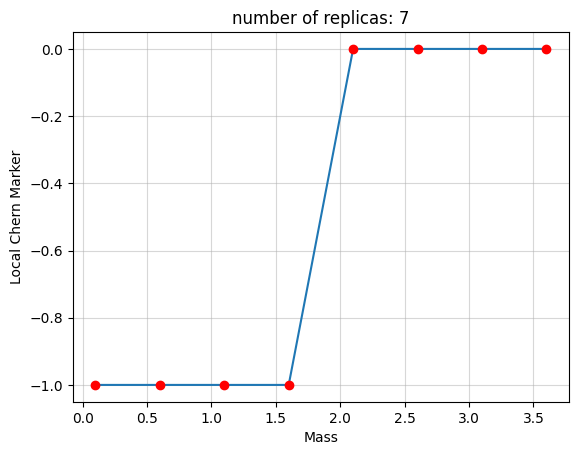

In [16]:
plt.plot(mass_vals, bott_vals)
plt.plot(mass_vals, bott_vals, 'ro')
plt.title("number of replicas: " + str(latsize))
plt.xlabel("Mass")
plt.ylabel("Local Chern Marker")
plt.grid(alpha=0.5)
plt.savefig("floqBHZ_chernVSmass.png")

In [ ]:
print(len(np.arange(0.1,3.5,0.5)))

<h2>Evolution of a an initial state due to $H_f$</h2>

In [ ]:
vec = np.zeros((2*latsize*latsize))
vec[0] = 1

t = 0
dt = 0.1
count = 1
while(t<5):
    vec = vec + dt*np.dot(m2, vec)
    vec = vec/la.norm(vec)
    # den = np.dot(np.conjugate(vec), vec)
    den = [np.conjugate(vec[2*i])*vec[2*i] + np.conjugate(vec[2*i + 1])*vec[2*i + 1] for i in range(latsize*latsize)]
    den = np.array(den).reshape((latsize, latsize))
    plt.imshow(np.real(den))
    plt.savefig('halfBHZfloq/evol/'+str(count)+'.png')
    t = t + dt
    count = count + 1

In [ ]:
w2 = 0.1
p = 8
q = 5
w1 = (p/q)*w2
w = w2/q
latsize = 3
phi1 = 0
phi2 = 0
mass = 1
m = np.array([1,1])
n = np.array([1,0])
wvec = np.array([w1, w2])

li = [i for i in range(1,100)]
val = []
for l in li:
    d = (0.5/l)*(integrate.quad(lambda t: np.real( (mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0] + 1j*integrate.quad(lambda t: np.imag((mass - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*np.exp(1j*t*np.dot(m-n, wvec))), 0, l)[0])
    val.append(d)
plt.plot(li, val)

Ignore the block above this for now, and continue with rational limit.

In [ ]:
w2 = 0.1
p = 8
q = 5
w1 = (p/q)*w2
w = w2/q
latsize = 3
# phi1 = 0
# phi2 = 0
mass = 2
dk = 0.1

Phi1 = np.arange(-np.pi, np.pi+dk , dk)
Phi2 = np.arange(-np.pi, np.pi+dk , dk)
bands = [ np.zeros((len(Phi1), len(Phi2)), dtype=complex) for i in range(2*latsize) ]
# bands = []

for i in range(len(Phi1)):
    for j in range(len(Phi2)):
        eigs = np.sort( la.eigvals( Hf(latsize, w1, Phi1[i], w2, Phi2[j], mass, w) ) )
        for ind in range(2*latsize):
            # band = np.zeros((len(Phi1), len(Phi2)), dtype=complex)
            # bands[ind, i,j] = eigs[ind]
            # print(ind, i, j)
            bands[ind][i,j] = eigs[ind]
            

In [ ]:
vec = np.matrix(np.zeros(2*latsize**2)).T
vec[0] = 1
w2 = 0.1
p = 8
q = 5
w1 = (p/q)*w2
w = w2/q
latsize = 3
# phi1 = 0
# phi2 = 0
mass = 2
ham = np.matrix(Hf(latsize, w1, 0, w2, 0, mass, w))
dt = 0.1
t = 0
while(t<5):
    vec = vec + dt*(ham@vec)
    t = t + dt



In [ ]:
Hf(latsize, w1, 0, w2, 0, mass, w).shape

In [ ]:
eigs

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(Phi1, Phi2)

for i in bands:
        ax.plot_surface(X, Y,  np.real(i))
# ax.plot_surface(X, Y, z1)
# ax.plot_surface(X, Y, z2)
plt.show()

